# 初始化

In [1]:
import plotly_express as px

## Built-in sample datasets

In [2]:
# print(px.data.iris.__doc__)
iris = px.data.iris()

In [3]:
tips = px.data.tips()
gapminder = px.data.gapminder()
election = px.data.election()
wind = px.data.wind()
carshare = px.data.carshare()

## Scatter and Line plots

In [4]:
iris.shape

(150, 6)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


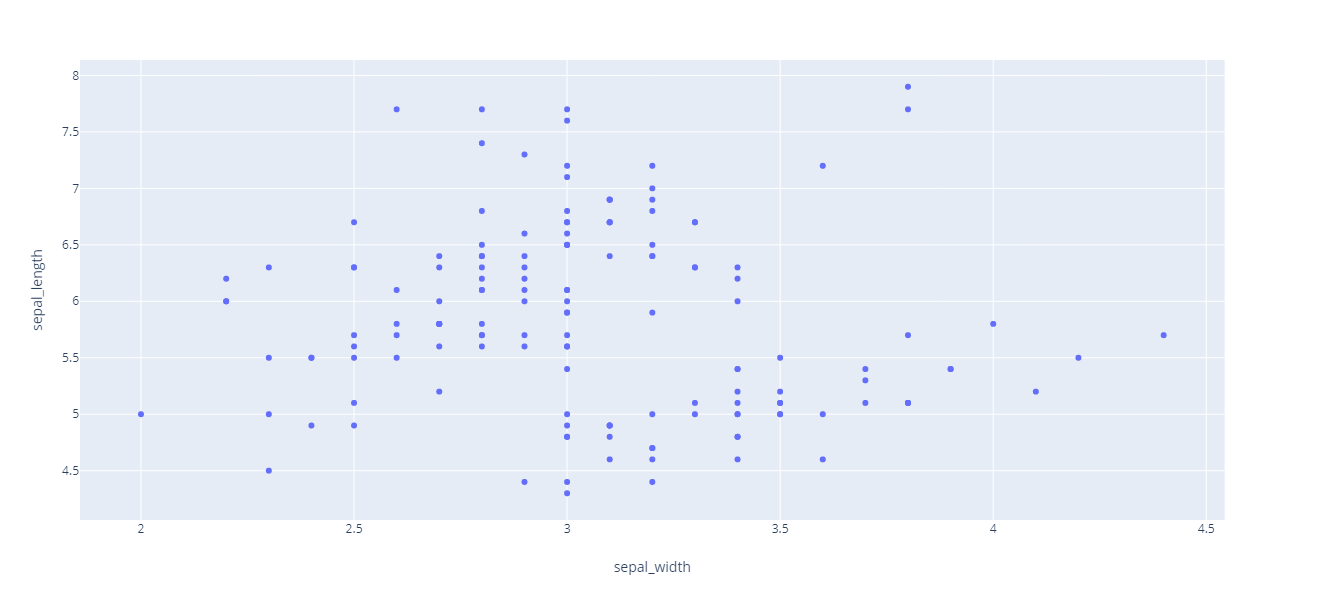

In [9]:
px.scatter(iris, x="sepal_width", y="sepal_length")

In [ ]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species")

In [ ]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="rug")

In [ ]:
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", 
           marginal_x="box", trendline="ols")

In [ ]:
iris["e"] = iris["sepal_width"]/100
px.scatter(iris, x="sepal_width", y="sepal_length", color="species", error_x="e", error_y="e")

In [ ]:
del iris["e"]

In [ ]:
px.scatter(tips, x="total_bill", y="tip", facet_row="time", facet_col="day", color="smoker", trendline="ols",
          category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

In [ ]:
px.scatter(tips, x="total_bill", y="tip", color="size", facet_col="sex",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")

In [ ]:
px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent", 
           hover_name="country", log_x=True, size_max=60)

In [ ]:
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])

In [ ]:
px.scatter_matrix(iris)

In [ ]:
px.scatter_matrix(iris, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")

In [ ]:
px.parallel_coordinates(iris, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length", 
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)

In [ ]:
px.parallel_categories(tips, color="size", color_continuous_scale=px.colors.sequential.Inferno)

In [ ]:
px.line(gapminder, x="year", y="lifeExp", color="continent", line_group="country", hover_name="country", 
        line_shape="spline")

## Visualize Distributions

In [ ]:
px.density_contour(iris, x="sepal_width", y="sepal_length")

In [ ]:
px.density_contour(iris, x="sepal_width", y="sepal_length", color="species")

In [ ]:
px.density_contour(tips, x="total_bill", y="tip", color="day", facet_col="day")

In [ ]:
px.bar(tips, x="total_bill", y="sex", orientation="h", color="smoker")

In [ ]:
px.histogram(tips, x="total_bill", y="tip")

In [ ]:
px.histogram(tips, x="sex", y="tip", color="smoker", facet_row="day", orientation="v", barmode="group",
      category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

In [ ]:
px.histogram(tips, x="total_bill", y="tip", histfunc="sum", color="smoker")

In [ ]:
px.histogram(tips, x="total_bill", color="smoker", facet_row="day", facet_col="time")

In [ ]:
px.box(tips, x="total_bill", y="day", orientation="h", color="smoker", notched=True,
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

In [ ]:
px.violin(tips, y="tip", x="smoker", color="sex", box=True, points="all")

In [ ]:
px.violin(tips, y="tip", x="sex", color="smoker", facet_row="day")

In [ ]:
px.violin(tips, y="tip", x="sex", color="smoker", facet_col="day", facet_row="time")

In [ ]:
px.box(tips, y="tip", x="sex")

In [ ]:
px.box(tips, y="tip", x="sex", color="smoker", facet_col="day", facet_row="time", 
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

In [ ]:
px.box(tips, x="tip", y="sex", color="smoker", facet_col="day", facet_row="time", orientation="h")

## Ternary Coordinates

In [ ]:
px.scatter_ternary(election, a="Joly", b="Coderre", c="Bergeron", color="winner", size="total", hover_name="district",
                   symbol="result", 
                   size_max=15, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"}
                  )

In [ ]:
px.line_ternary(election, a="Joly", b="Coderre", c="Bergeron", color="winner", line_dash="winner")

## Polar Coordinates

In [ ]:
px.scatter_polar(wind, r="value", theta="direction", color="strength", symbol="strength",
            color_discrete_sequence=px.colors.sequential.Plotly[-2::-1])

In [ ]:
px.line_polar(wind, r="value", theta="direction", color="strength", line_close=True,
            color_discrete_sequence=px.colors.sequential.Plotly[-2::-1])

In [ ]:
px.bar_polar(wind, r="value", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plotly[-2::-1])

## Maps

In [ ]:
px.set_mapbox_access_token(open(".mapbox_token").read())
px.scatter_mapbox(carshare, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours", 
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

In [ ]:
px.scatter_geo(gapminder, locations="iso_alpha", color="continent", hover_name="country", size="pop", 
               animation_frame="year", projection="natural earth")

## Built-in Color Scales and Sequences (and a way to see them!)

In [ ]:
px.colors.qualitative.swatches()

In [ ]:
px.colors.sequential.swatches()

px.colors.diverging.swatches()
px.colors.cyclical.swatches()
px.colors.colorbrewer.swatches()
px.colors.cmocean.swatches()
px.colors.carto.swatches()